In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('loan_data.csv')

In [7]:
class_y = data[data['Loan_Status'] == 'Y']
class_n = data[data['Loan_Status'] == 'N']

In [8]:
centroid_y = class_y['LoanAmount'].mean()
centroid_n = class_n['LoanAmount'].mean()

In [9]:
spread_y = class_y['LoanAmount'].std()
spread_n = class_n['LoanAmount'].std()

In [10]:
interclass_distance = np.linalg.norm(centroid_y - centroid_n)

In [11]:
print(f'Centroid of Class Y: {centroid_y}')
print(f'Spread of Class Y: {spread_y}')
print(f'Centroid of Class N: {centroid_n}')
print(f'Spread of Class N: {spread_n}')
print(f'Interclass Distance: {interclass_distance}')

Centroid of Class Y: 105.76515151515152
Spread of Class Y: 28.84160488947398
Centroid of Class N: 102.85321100917432
Spread of Class N: 27.62306661177206
Interclass Distance: 2.9119405059771992


In [13]:
centroids = [centroid_y, centroid_n]
spreads = [spread_y, spread_n]
labels = ['Class Y', 'Class N']

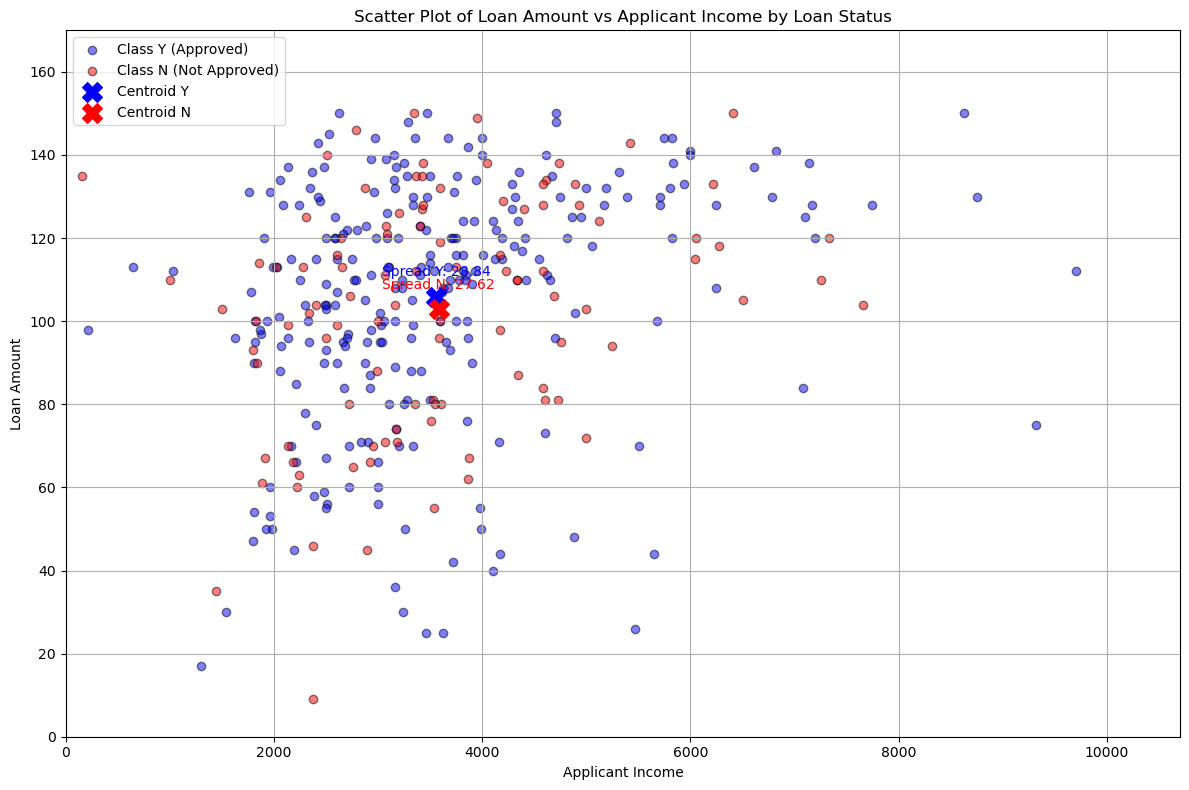

In [19]:
plt.figure(figsize=(12, 8))

# Scatter plot for Class Y
plt.scatter(class_y['ApplicantIncome'], class_y['LoanAmount'], 
            alpha=0.5, label='Class Y (Approved)', color='blue', edgecolor='black')

# Scatter plot for Class N
plt.scatter(class_n['ApplicantIncome'], class_n['LoanAmount'], 
            alpha=0.5, label='Class N (Not Approved)', color='red', edgecolor='black')

# Annotate centroids
plt.scatter([class_y['ApplicantIncome'].mean()], [centroid_y], color='blue', marker='X', s=200, label='Centroid Y')
plt.scatter([class_n['ApplicantIncome'].mean()], [centroid_n], color='red', marker='X', s=200, label='Centroid N')

# Add text for spreads
plt.text(class_y['ApplicantIncome'].mean(), centroid_y + 5, f'Spread Y: {spread_y:.2f}', 
         color='blue', fontsize=10, ha='center')
plt.text(class_n['ApplicantIncome'].mean(), centroid_n + 5, f'Spread N: {spread_n:.2f}', 
         color='red', fontsize=10, ha='center')

# Add titles and labels
plt.title('Scatter Plot of Loan Amount vs Applicant Income by Loan Status')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.legend(loc='upper left')

# Adjust axes limits to separate classes
plt.xlim(0, max(data['ApplicantIncome']) + 1000)
plt.ylim(0, max(data['LoanAmount']) + 20)

plt.grid()
plt.tight_layout()
plt.show()

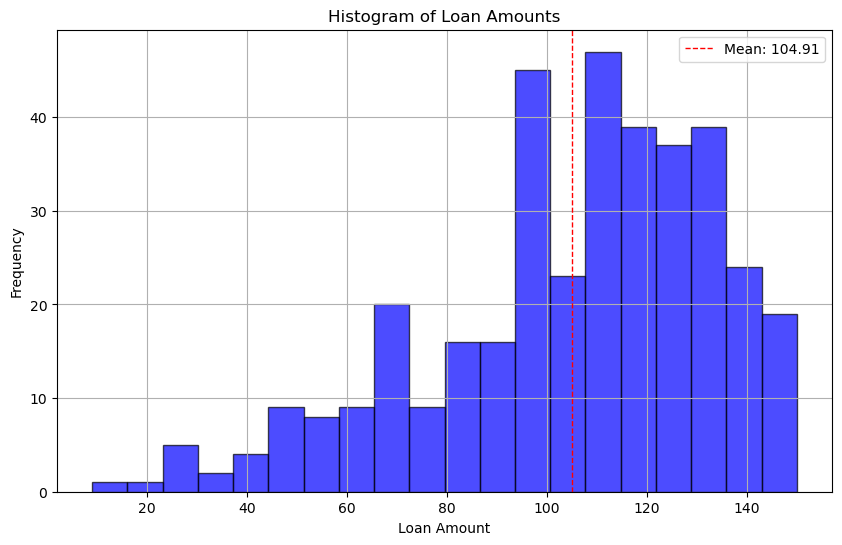

Mean Loan Amount: 104.91
Variance of Loan Amount: 811.39


In [22]:
# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(loan_amount, bins=20, alpha=0.7, color='blue', edgecolor='black')
plt.title('Histogram of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.axvline(mean_loan_amount, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_loan_amount:.2f}')
plt.legend()
plt.grid()
plt.show()

print(f'Mean Loan Amount: {mean_loan_amount:.2f}')
print(f'Variance of Loan Amount: {variance_loan_amount:.2f}')

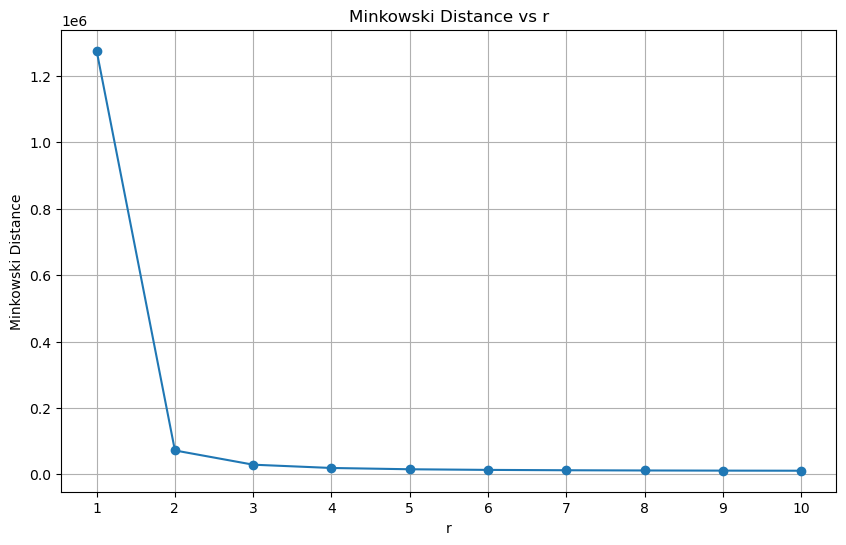

In [23]:
from scipy.spatial.distance import minkowski

# Select two feature vectors
feature1 = data['LoanAmount'].dropna()
feature2 = data['ApplicantIncome'].dropna()

# Ensure both features are of the same length
min_length = min(len(feature1), len(feature2))
feature1 = feature1[:min_length]
feature2 = feature2[:min_length]

# Calculate Minkowski distance for r from 1 to 10
r_values = np.arange(1, 11)
distances = [minkowski(feature1, feature2, r) for r in r_values]

# Plot the distances
plt.figure(figsize=(10, 6))
plt.plot(r_values, distances, marker='o')
plt.title('Minkowski Distance vs r')
plt.xlabel('r')
plt.ylabel('Minkowski Distance')
plt.grid()
plt.xticks(r_values)
plt.show()

In [26]:
import pandas as pd

# Load the dataset
data = pd.read_csv('loan_data.csv')

# Check for missing values in LoanAmount and ApplicantIncome
print(data[['LoanAmount', 'ApplicantIncome', 'Loan_Status']].isnull().sum())
# Prepare feature matrix X and target vector y
X = data[['LoanAmount', 'ApplicantIncome']]
y = data['Loan_Status']

# Drop rows with missing values in either X or y
X = X.dropna()
y = y[X.index]  # Align y with the remaining X

# Check lengths
print(f'Length of X: {len(X)}, Length of y: {len(y)}')
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f'Training set size: {len(X_train)}')
print(f'Test set size: {len(X_test)}')
X['LoanAmount'] = pd.to_numeric(X['LoanAmount'], errors='coerce')
X['ApplicantIncome'] = pd.to_numeric(X['ApplicantIncome'], errors='coerce')
X = X.drop_duplicates()
y = y[X.index]  
print(data.head())

LoanAmount          8
ApplicantIncome    12
Loan_Status         0
dtype: int64
Length of X: 361, Length of y: 361
Training set size: 252
Test set size: 109
   Unnamed: 0   Loan_ID Gender Married Dependents     Education Self_Employed  \
0           0  LP001003   Male     Yes          1      Graduate            No   
1           1  LP001005   Male     Yes          0      Graduate           Yes   
2           2  LP001006   Male     Yes          0  Not Graduate            No   
3           3  LP001008   Male      No          0      Graduate            No   
4           4  LP001013   Male     Yes          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           4583.0             1508.0       128.0             360.0   
1           3000.0                0.0        66.0             360.0   
2           2583.0             2358.0       120.0             360.0   
3           6000.0                0.0       141.0             360.0   
4 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the kNN classifier with k=3
neigh = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier to the training data
neigh.fit(X_train, y_train)